<a href="https://colab.research.google.com/github/jeeswan/Data-Warehousing-and-Data-Mining-/blob/main/DWLAB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Q1. Write a code to find the province with the most hydropowers and plot them in a map.
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load the hydropower project CSV
csv_path = "hydropower-projects.csv"

df = pd.read_csv(csv_path)

In [ ]:
# Step 2: Find the province with the most hydropower projects
province_counts = df['Province'].value_counts()
top_province = province_counts.idxmax()
print(f"Province with most hydropower projects: {top_province}")

Province with most hydropower projects: Province 4


In [ ]:
# Step 3: Filter data for that province
top_df = df[df['Province'] == top_province]

In [ ]:
# Step 4: Convert filtered DataFrame to GeoDataFrame
gdf_points = gpd.GeoDataFrame(
    top_df,
    geometry=gpd.points_from_xy(top_df['Longitude'], top_df['Latitude']),
    crs="EPSG:4326"
)

In [ ]:
# Step 5: Load Nepal province shapefile
shapefile_path = "province.shp"  # update this path
gdf_provinces = gpd.read_file(shapefile_path)

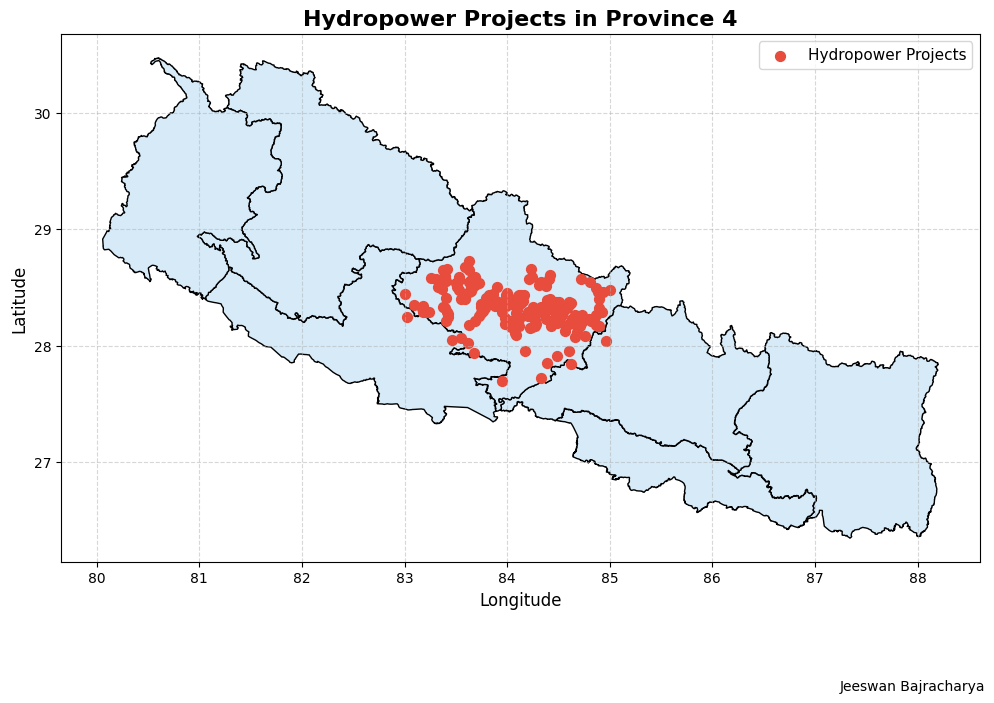

In [ ]:
# Step 6: Plot map
fig, ax = plt.subplots(figsize=(10, 8))
gdf_provinces.plot(ax=ax, color='#D6EAF8', edgecolor='black')
gdf_points.plot(ax=ax, color='#E74C3C', markersize=50, label='Hydropower Projects')

# Title and Labels
plt.title(f"Hydropower Projects in {top_province}", fontsize=16, fontweight='bold')
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

# Legend and credits
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)

# Add your name to the bottom right
plt.figtext(0.99, 0.01, "Jeeswan Bajracharya", ha="right", fontsize=10, color='Black')

plt.tight_layout()
plt.show()

In [ ]:
# Q2. Write a code to scrape the following urls
# https://en.wikipedia.org/wiki/Markov_decision_process
# https://en.wikipedia.org/wiki/Reinforcement_learning
# https://en.wikipedia.org/wiki/Multi-agent_reinforcement_learning
# https://en.wikipedia.org/wiki/Andrew_Barto
# https://en.wikipedia.org/wiki/Richard_S._Sutton
# https://pt.wikipedia.org/wiki/Aprendizagem_por_refor%C3%A7o

In [ ]:
pip install beautifulsoup4 requests

In [ ]:
import requests
from bs4 import BeautifulSoup

# List of URLs to scrape
urls = [
    "https://en.wikipedia.org/wiki/Markov_decision_process",
    "https://en.wikipedia.org/wiki/Reinforcement_learning",
    "https://en.wikipedia.org/wiki/Multi-agent_reinforcement_learning",
    "https://en.wikipedia.org/wiki/Andrew_Barto",
    "https://en.wikipedia.org/wiki/Richard_S._Sutton",
    "https://pt.wikipedia.org/wiki/Aprendizagem_por_refor%C3%A7o"
]

# Function to scrape and print paragraphs
def scrape_wikipedia(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise exception for HTTP errors

        soup = BeautifulSoup(response.text, 'html.parser')
        title = soup.find('h1').text.strip()
        paragraphs = soup.select('div.mw-parser-output > p')

        print(f"\n\n==== {title} ====")
        count = 0
        for p in paragraphs:
            text = p.get_text().strip()
            if text:
                print(text)
                count += 1
            if count == 3:  # print only the first 3 paragraphs
                break

    except Exception as e:
        print(f"Failed to scrape {url}: {e}")

# Run for each URL
for url in urls:
    scrape_wikipedia(url)



==== Markov decision process ====
Markov decision process (MDP), also called a stochastic dynamic program or stochastic control problem, is a model for sequential decision making when outcomes are uncertain.[1]
Originating from operations research in the 1950s,[2][3] MDPs have since gained recognition in a variety of fields, including ecology, economics, healthcare, telecommunications and reinforcement learning.[4] Reinforcement learning utilizes the MDP framework to model the interaction between a learning agent and its environment. In this framework, the interaction is characterized by states, actions, and rewards. The MDP framework is designed to provide a simplified representation of key elements of artificial intelligence challenges. These elements encompass the understanding of cause and effect, the management of uncertainty and nondeterminism, and the pursuit of explicit goals.[4]
The name comes from its connection to Markov chains, a concept developed by the Russian mathemati

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


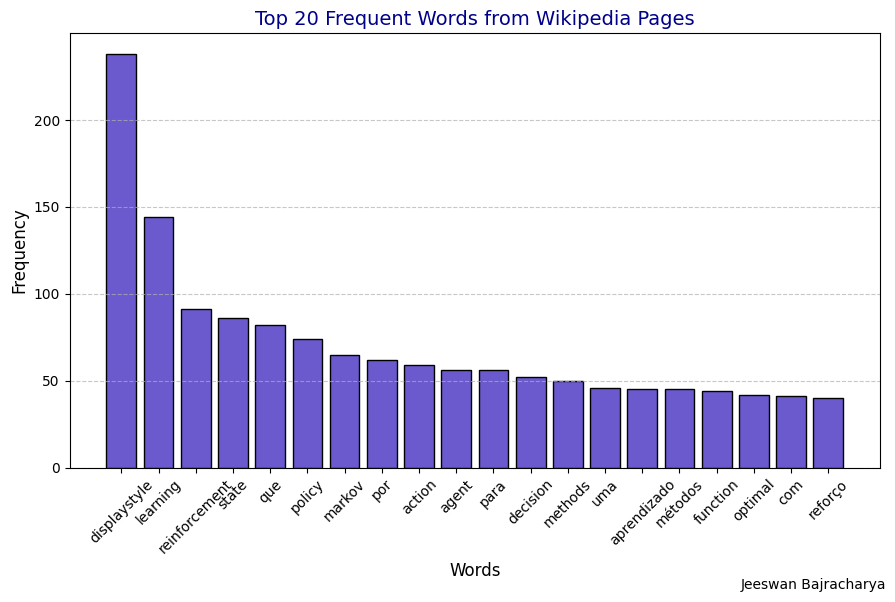


 Text Clustering Results:
                             Title  Cluster
           Markov decision process        2
            Reinforcement learning        2
Multi-agent reinforcement learning        0
                      Andrew Barto        1
                 Richard S. Sutton        1
          Aprendizagem por reforço        2


In [ ]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter
import re
import nltk
import pandas as pd

nltk.download('stopwords')
from nltk.corpus import stopwords

# -----------------------
# STEP 1: URLs to scrape
# -----------------------
urls = [
    "https://en.wikipedia.org/wiki/Markov_decision_process",
    "https://en.wikipedia.org/wiki/Reinforcement_learning",
    "https://en.wikipedia.org/wiki/Multi-agent_reinforcement_learning",
    "https://en.wikipedia.org/wiki/Andrew_Barto",
    "https://en.wikipedia.org/wiki/Richard_S._Sutton",
    "https://pt.wikipedia.org/wiki/Aprendizagem_por_refor%C3%A7o"
]

# ----------------------------
# STEP 2: Scrape page content
# ----------------------------
texts = []
titles = []

for url in urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    title = soup.find('h1').text.strip()
    titles.append(title)

    paragraphs = soup.select("div.mw-parser-output > p")
    text = ' '.join(p.get_text() for p in paragraphs)
    texts.append(text)

# -----------------------------------
# STEP 3: Clean and tokenize text
# -----------------------------------
def clean_text(text):
    text = text.lower()
    text = re.sub(r'', '', text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\d+', '', text)
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return tokens

all_tokens = []
for text in texts:
    tokens = clean_text(text)
    all_tokens.extend(tokens)

# -------------------------------
# STEP 4: Plot top 20 words with name at bottom right
# -------------------------------
counter = Counter(all_tokens)
top_20 = counter.most_common(20)

words, counts = zip(*top_20)
plt.figure(figsize=(9, 6))
plt.bar(words, counts, color='#6a5acd', edgecolor='black')
plt.xticks(rotation=45)
plt.title("Top 20 Frequent Words from Wikipedia Pages", fontsize=14, color='darkblue')
plt.xlabel("Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add your name at bottom right corner
plt.figtext(0.99, 0.01, "Jeeswan Bajracharya", ha='right', fontsize=10, color='Black')

plt.show()

# --------------------------------------------
# STEP 5: Text Clustering using TF-IDF + KMeans
# --------------------------------------------
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# --------------------------------
# STEP 6: Print Cluster Assignments
# --------------------------------
print("\n Text Clustering Results:")
df = pd.DataFrame({'Title': titles, 'Cluster': labels})
print(df.to_string(index=False))

In [ ]:
# Q3. Write a program to implement text clustering.

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans



# Step 2: Loading  text file from Drive
file_path = 'question_3_data.txt'


with open(file_path, 'r', encoding='utf-8') as file:
    documents = file.readlines()

# Clean documents by stripping whitespace and removing empty lines
documents = [doc.strip() for doc in documents if doc.strip()]

# Step 3: Convert documents to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Step 4: Apply KMeans clustering
num_clusters = 3  # adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Step 5: Print clustering results cleanly
print("\n===== Text Clustering Results =====")
for i, doc in enumerate(documents):
    cluster = kmeans.labels_[i]
    print(f"\n--- Document {i+1} (Cluster {cluster}) ---")
    print(doc)

print("\n Jeeswan Bajracharya")


===== Text Clustering Results =====

--- Document 1 (Cluster 2) ---
WASHINGTON/SEATTLE, July 17 (Reuters) - A cockpit recording of dialogue between the two pilots of the Air India flight that crashed last month supports the view that the captain cut the flow of fuel to the plane's engines, said a source briefed on U.S. officials' early assessment of evidence.

--- Document 2 (Cluster 2) ---
The first officer was at the controls of the Boeing (BA.N), opens new tab 787 and asked the captain why he moved the fuel switches into a position that starved the engines of fuel and requested that he restore the fuel flow, the source told Reuters on condition of anonymity because the matter remains under investigation.

--- Document 3 (Cluster 2) ---
The Reuters Tariff Watch newsletter is your daily guide to the latest global trade and tariff news.

--- Document 4 (Cluster 0) ---
"When we update any part of a system, we need to make sure we’re not introducing regressions — and ideally, that we’re

In [ ]:
# Q4. Download the data from MSNBC.
# Write a program to count the frequency of each page category and plot a bar chart.
# Identify and count all page-to-page transitions (e.g., FrontPage → News).
# Plot a Sankey diagram to visualize the top 30 most common transitions.

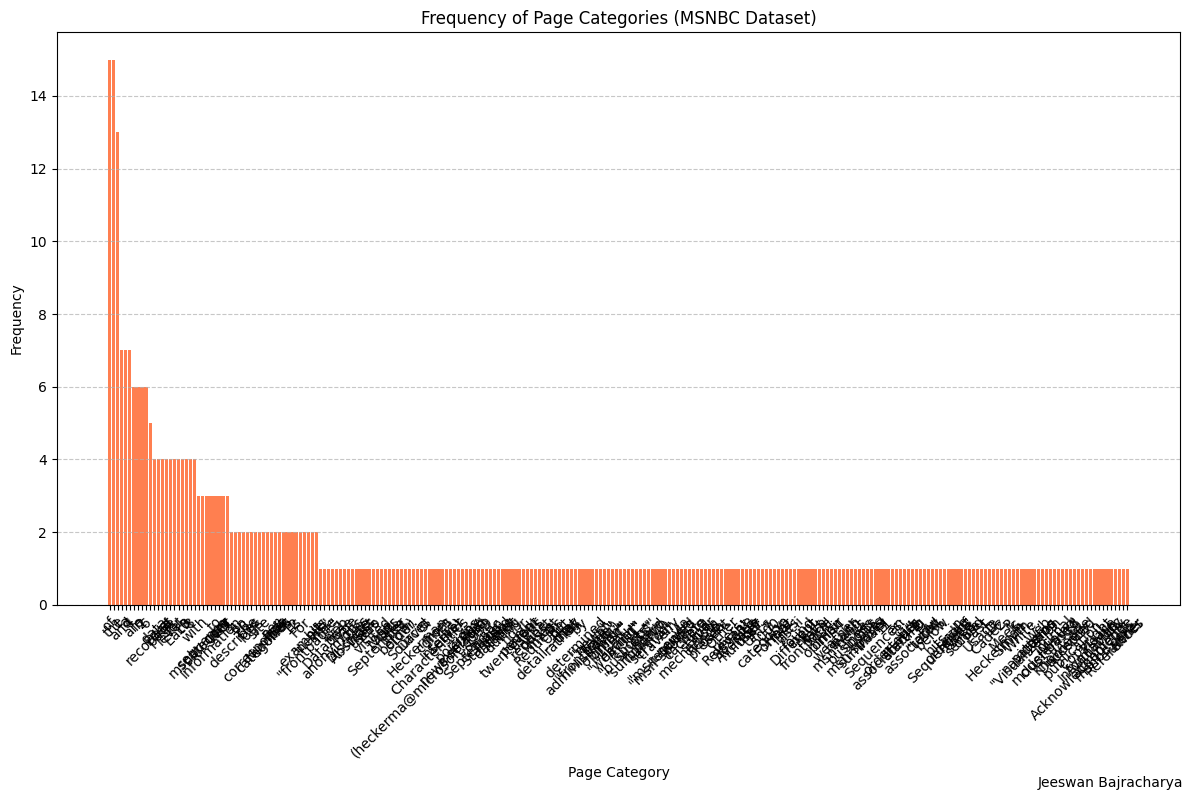

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import plotly.graph_objects as go


file_path = 'description.txt'

# Step 1: Loading data from Drive
with open(file_path, 'r') as f:
    sessions = [line.strip().split() for line in f.readlines()]

# Flatten all pages to count frequency
all_pages = [page for session in sessions for page in session]

# Step 2: Count frequency of each page category
page_counts = Counter(all_pages)

# Plot page category frequency bar chart
plt.figure(figsize=(12,8))
pages, counts = zip(*page_counts.most_common())
plt.bar(pages, counts, color='coral')
plt.title("Frequency of Page Categories (MSNBC Dataset)")
plt.xlabel("Page Category")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.figtext(0.99, 0.01, "Jeeswan Bajracharya", ha="right", fontsize=10, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 3: Identify and count all page-to-page transitions
transitions = []
for session in sessions:
    for i in range(len(session) - 1):
        transitions.append((session[i], session[i+1]))

transition_counts = Counter(transitions)

# Step 4: Get top 30 most common transitions
top_transitions = transition_counts.most_common(30)

# Prepare data for Sankey diagram
labels = list(set([page for pair in transition_counts.keys() for page in pair]))
label_indices = {label: i for i, label in enumerate(labels)}

source = [label_indices[pair[0]] for pair, count in top_transitions]
target = [label_indices[pair[1]] for pair, count in top_transitions]
value = [count for pair, count in top_transitions]

# Step 5: Plot Sankey Diagram using Plotly
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="lightblue"
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color="lightgreen"
    ))])

fig.update_layout(
    title_text="Top 30 Most Common Page-to-Page Transitions (MSNBC Dataset)",
    font_size=12,
    annotations=[dict(text="Jeeswan Bajracharya", x=1, y=0, showarrow=False, xanchor='right', yanchor='bottom', font=dict(size=14))]
)
fig.show()